Attribute Information:

age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import xgboost
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
import joblib
import pickle

In [4]:
dataset=pd.read_csv("W:\dataset\heart.csv")

EDA

In [5]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.shape

(303, 14)

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
numerical_variables=dataset.select_dtypes(include=['int64','float64']).columns
categorical_variable=dataset.select_dtypes(include=['object']).columns

In [11]:
print(numerical_variables)
print(len(numerical_variables))

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
14


In [12]:
print(categorical_variable)
print(len(categorical_variable))

Index([], dtype='object')
0


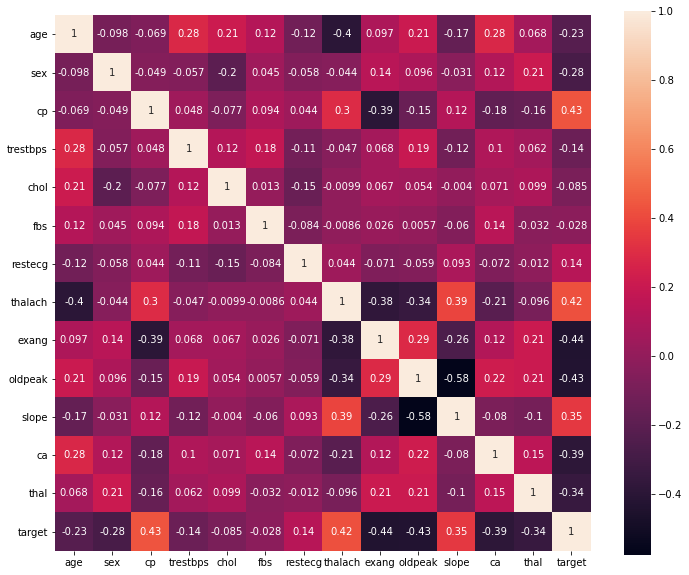

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(),annot=True,square=True)

In [14]:
dataset.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [15]:
dataset.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

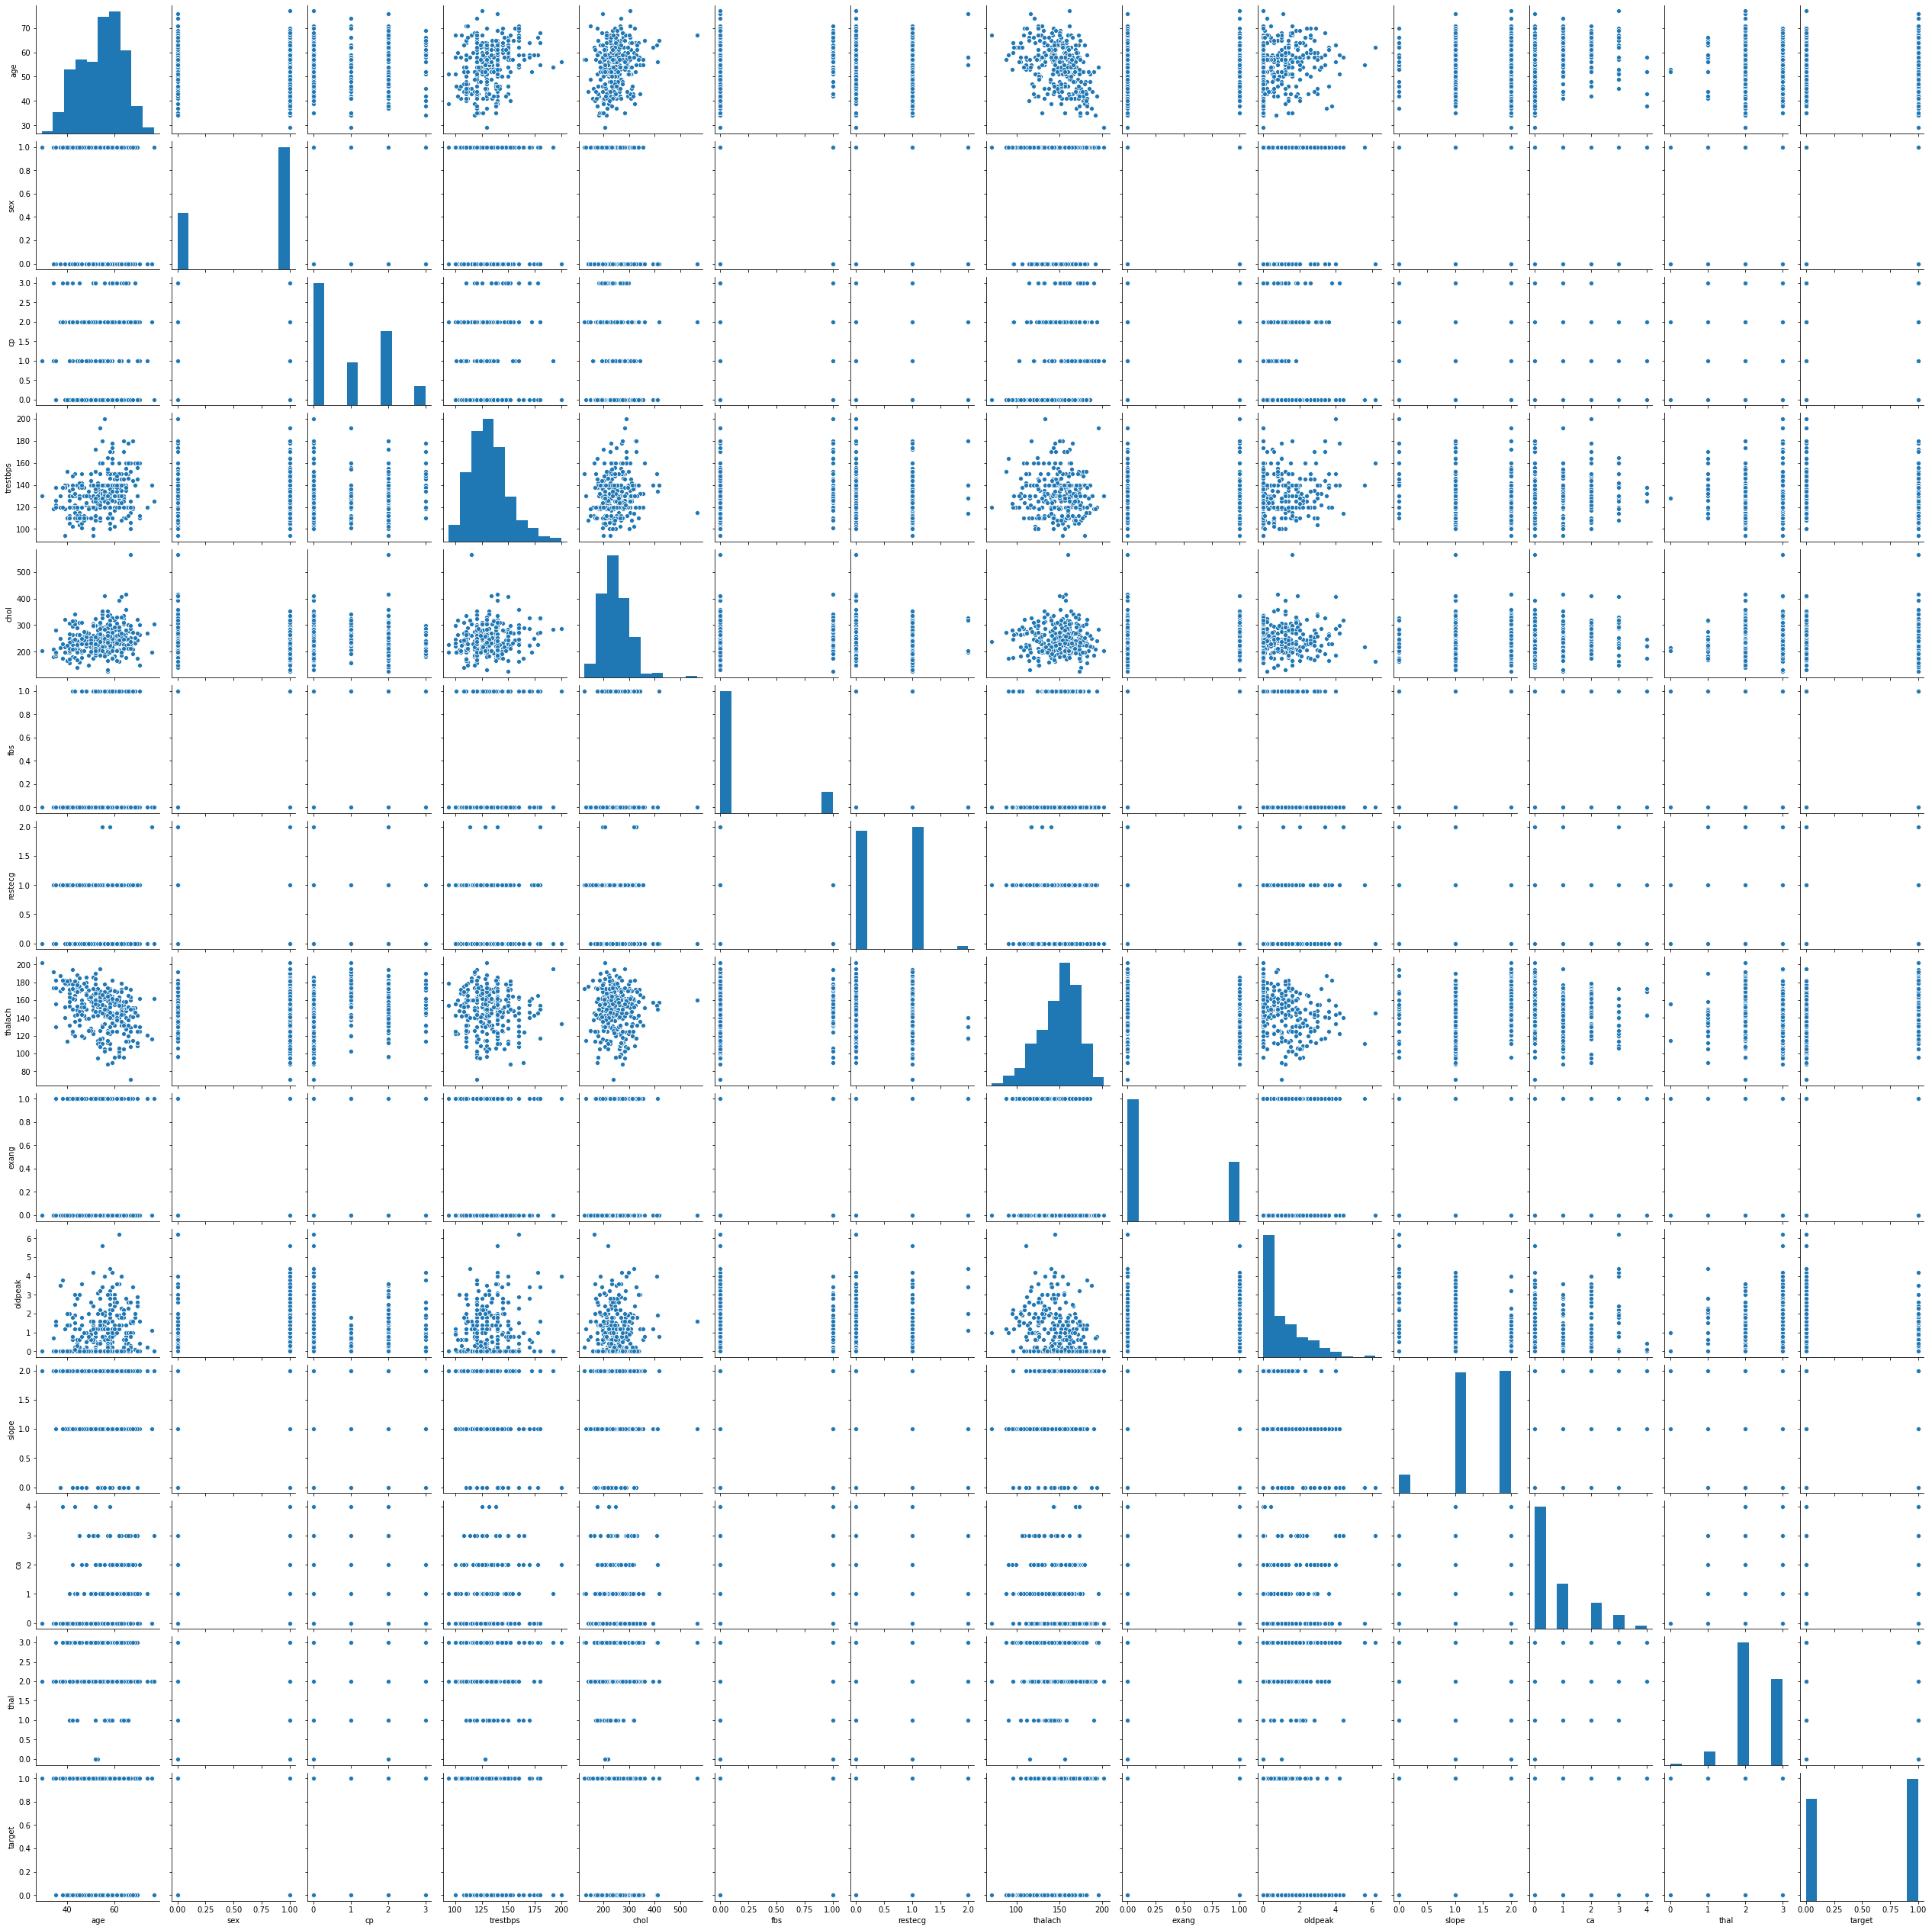

In [16]:
sns.pairplot(dataset)

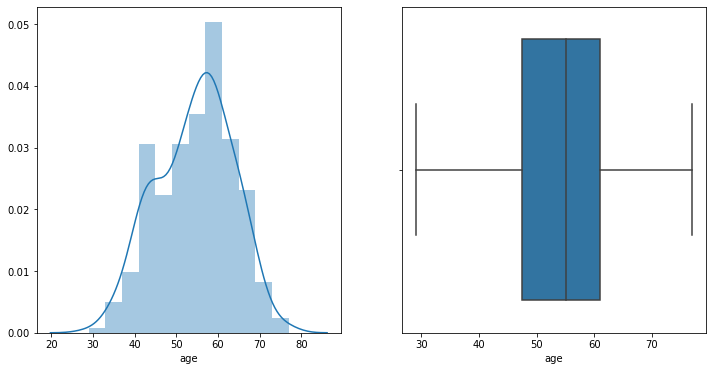

In [17]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(dataset['age'])
plt.subplot(1,2,2)
sns.boxplot(dataset['age'])

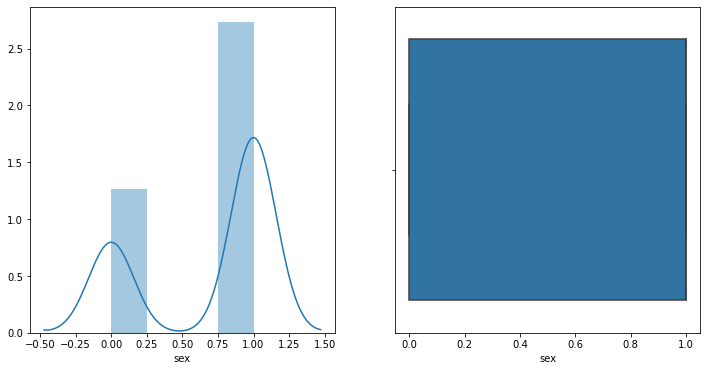

In [18]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(dataset['sex'])
plt.subplot(1,2,2)
sns.boxplot(dataset['sex'])

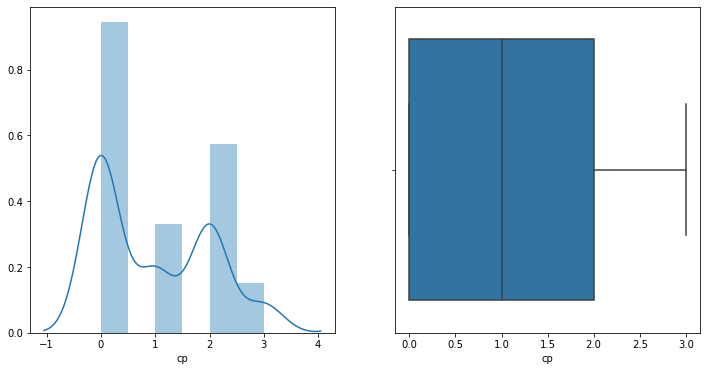

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(dataset['cp'])
plt.subplot(1,2,2)
sns.boxplot(dataset['cp'])

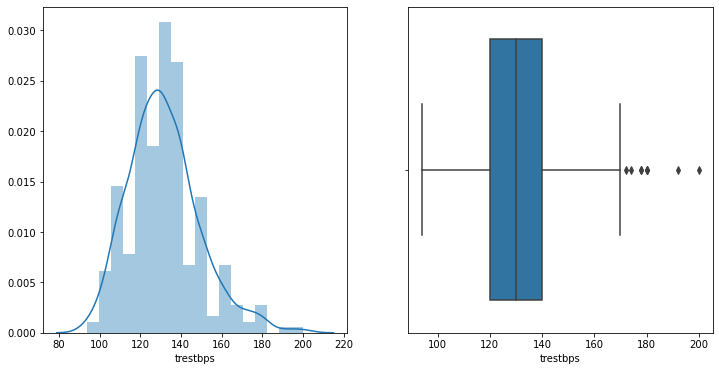

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(dataset['trestbps'])
plt.subplot(1,2,2)
sns.boxplot(dataset['trestbps'])

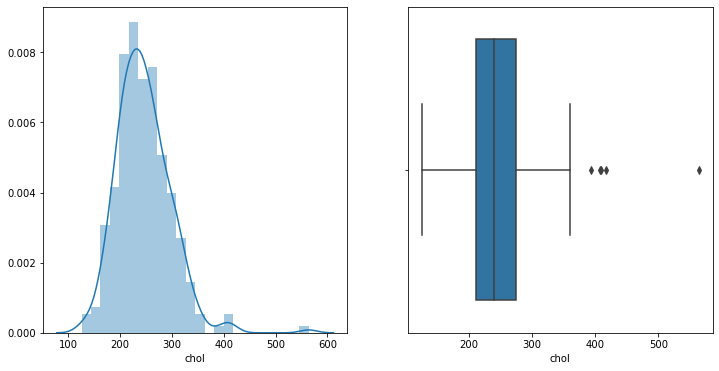

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(dataset['chol'])
plt.subplot(1,2,2)
sns.boxplot(dataset['chol'])

C:\Anaconda_program\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


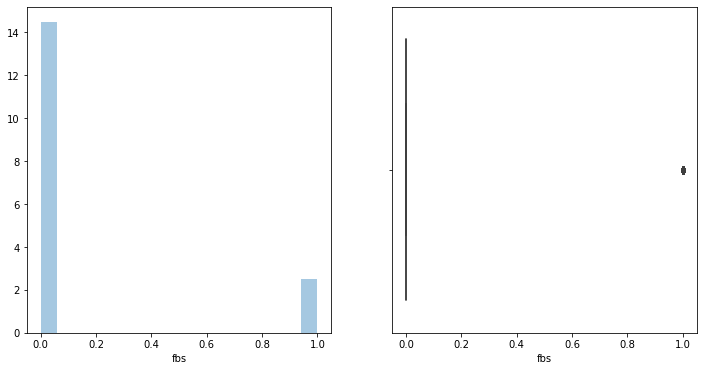

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(dataset['fbs'])
plt.subplot(1,2,2)
sns.boxplot(dataset['fbs'])

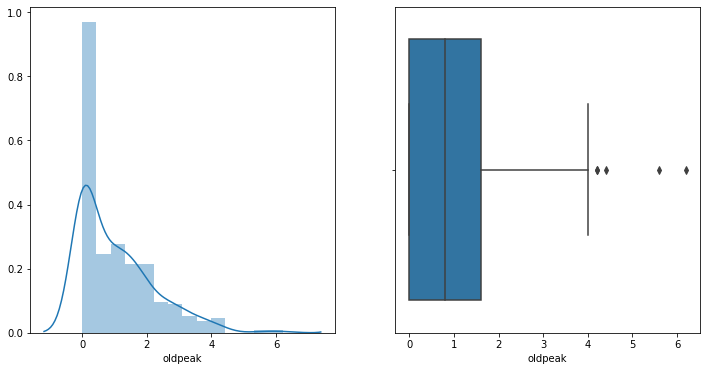

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(dataset['oldpeak'])
plt.subplot(1,2,2)
sns.boxplot(dataset['oldpeak'])

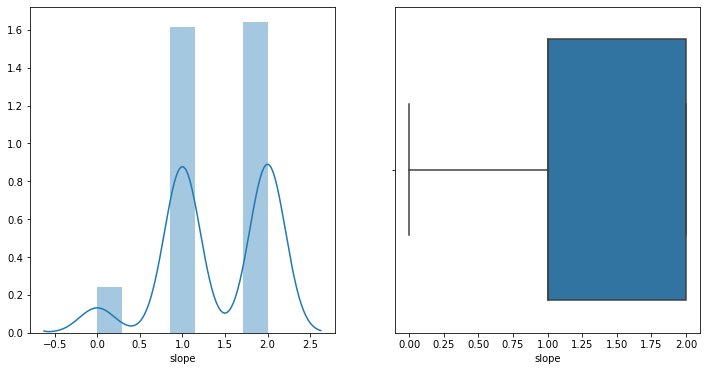

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(dataset['slope'])
plt.subplot(1,2,2)
sns.boxplot(dataset['slope'])

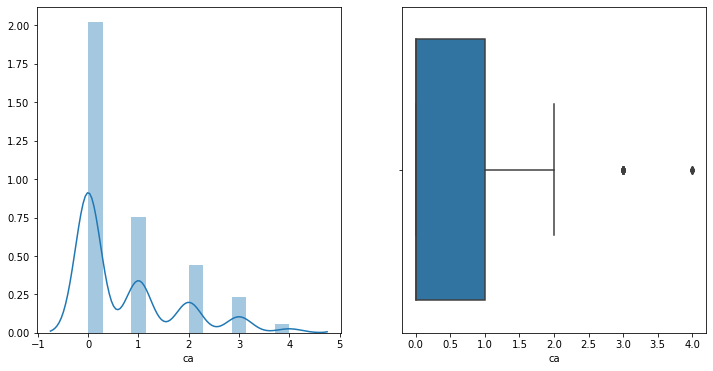

In [25]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(dataset['ca'])
plt.subplot(1,2,2)
sns.boxplot(dataset['ca'])

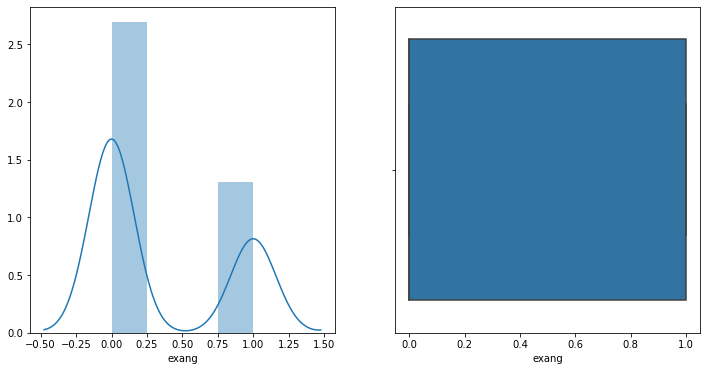

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(dataset['exang'])
plt.subplot(1,2,2)
sns.boxplot(dataset['exang'])

<Figure size 864x720 with 0 Axes>

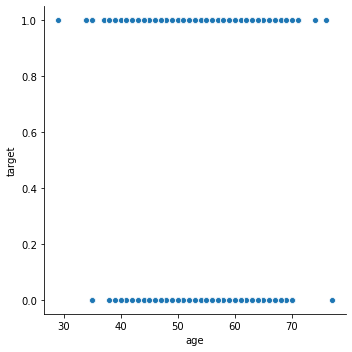

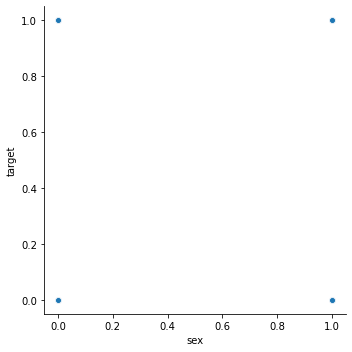

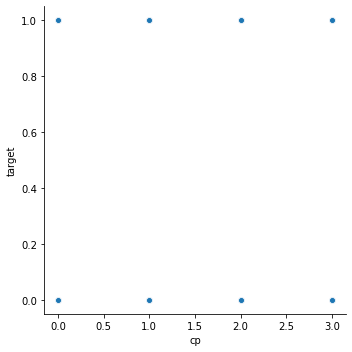

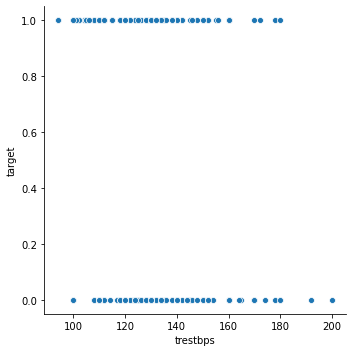

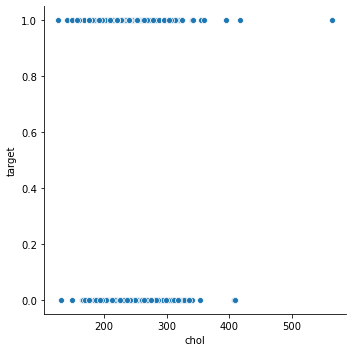

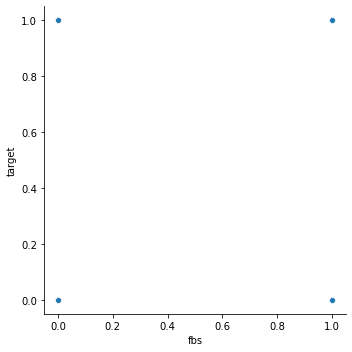

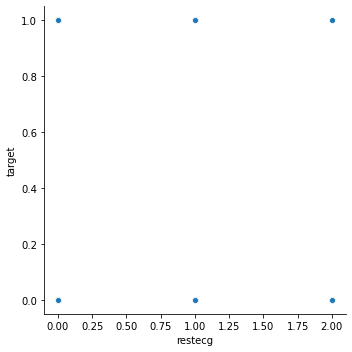

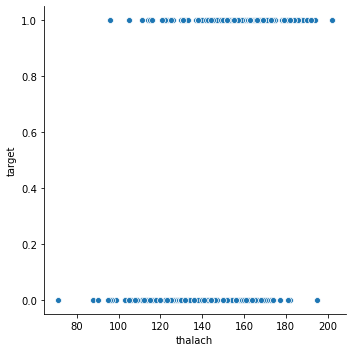

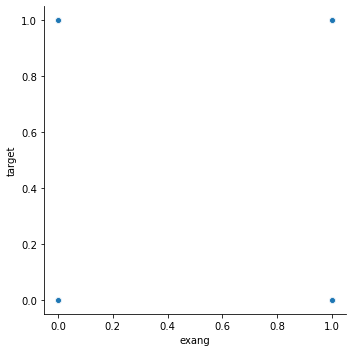

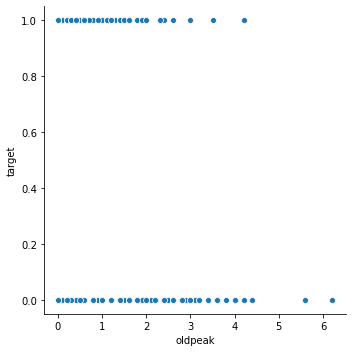

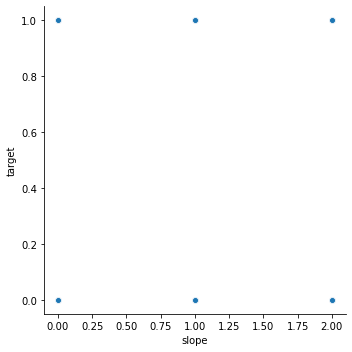

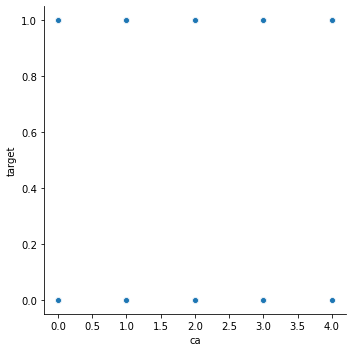

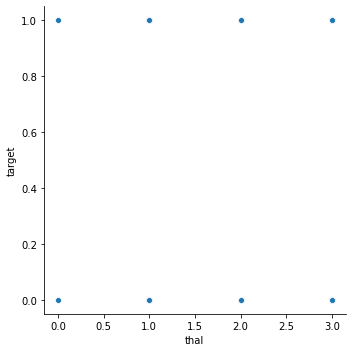

In [27]:
features=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal',]
plt.figure(figsize=(12,10))
for i,feature in enumerate(features):
    sns.relplot(x=feature,y='target',data=dataset)

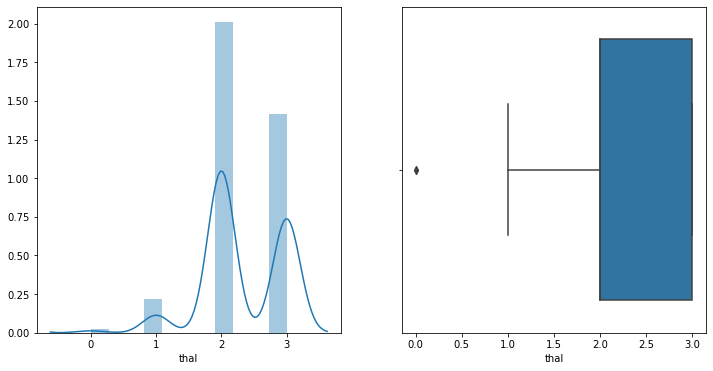

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(dataset['thal'])
plt.subplot(1,2,2)
sns.boxplot(dataset['thal'])

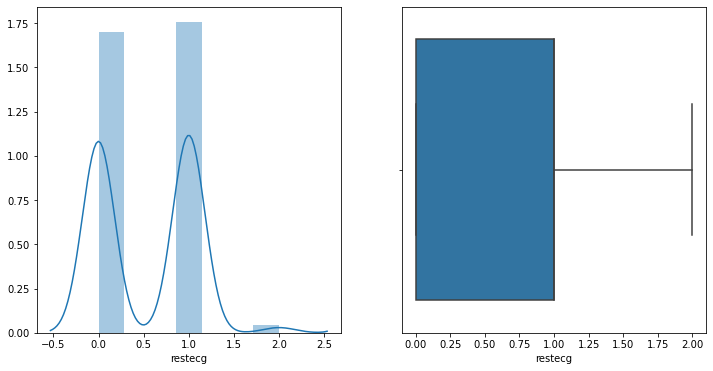

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(dataset['restecg'])
plt.subplot(1,2,2)
sns.boxplot(dataset['restecg'])

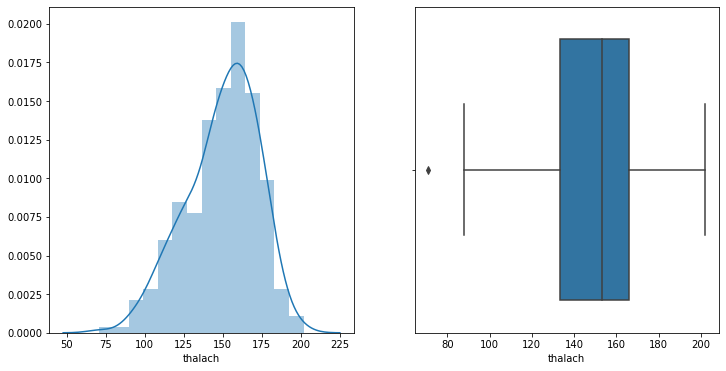

In [30]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(dataset['thalach'])
plt.subplot(1,2,2)
sns.boxplot(dataset['thalach'])

C:\Anaconda_program\lib\site-packages\statsmodels\nonparametric\kernels.py:125: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Anaconda_program\lib\site-packages\statsmodels\nonparametric\kernels.py:125: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Anaconda_program\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\Anaconda_program\lib\site-packages\matplotlib\contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Anaconda_program\lib\site-packages\matplotlib\contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Anaconda_program\lib\site-packages\matplotlib\contour.py:1132: RuntimeWarni

<Figure size 864x720 with 0 Axes>

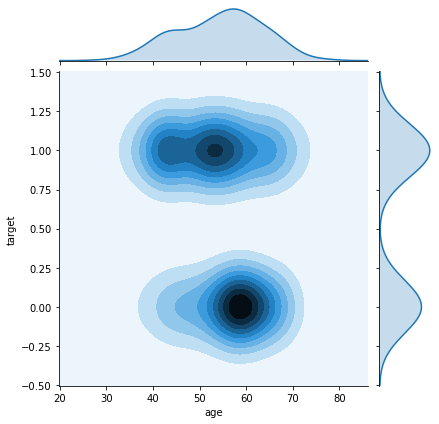

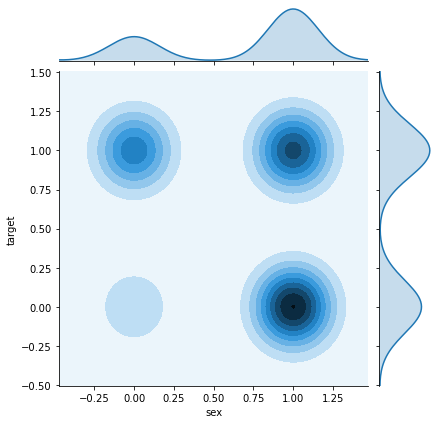

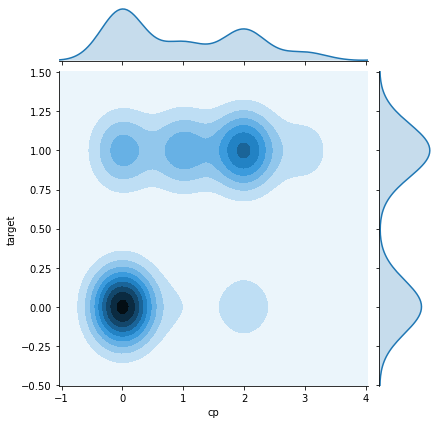

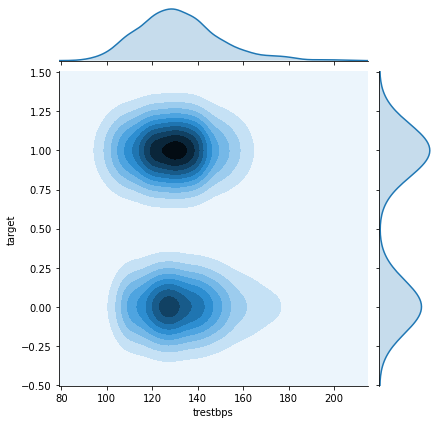

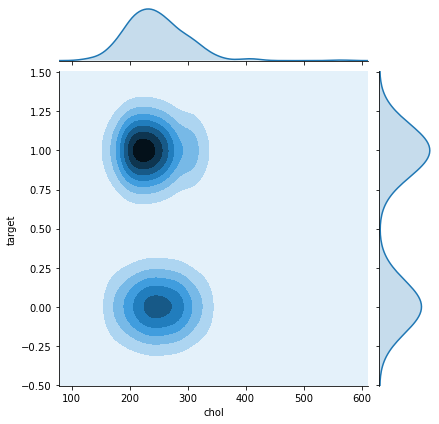

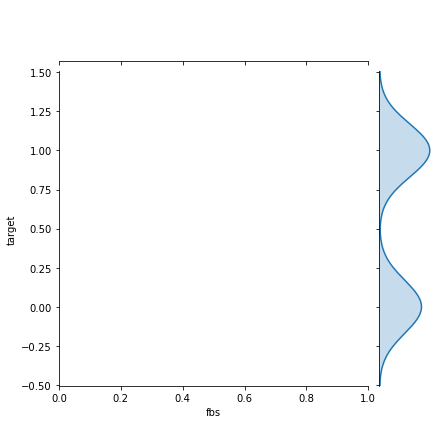

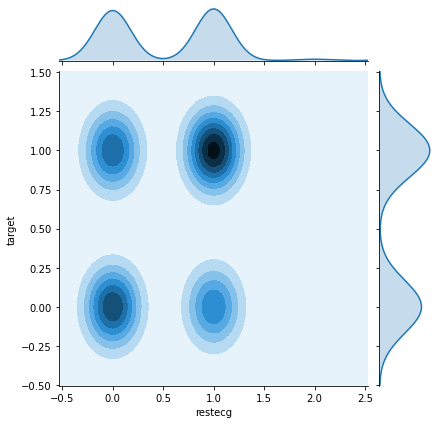

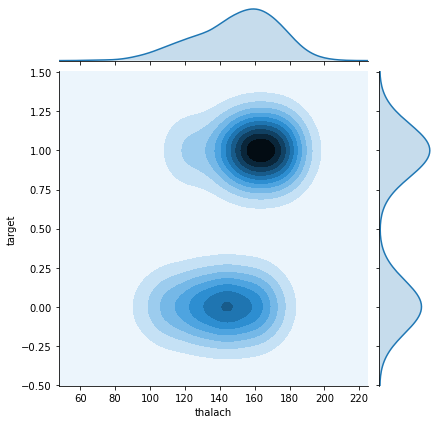

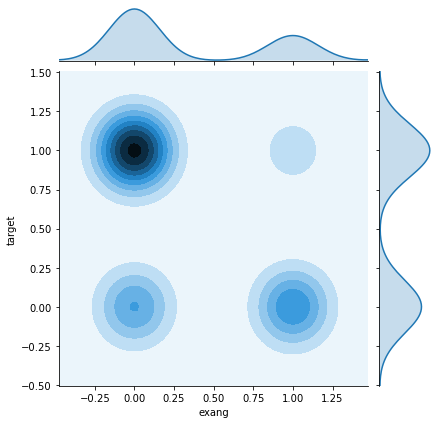

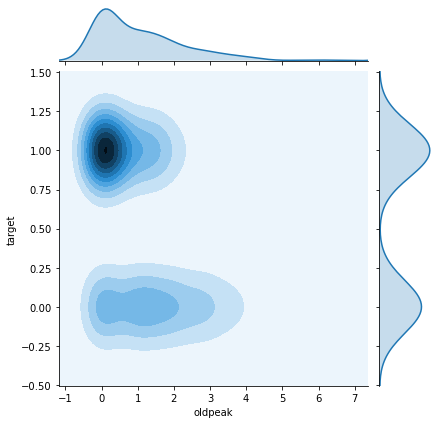

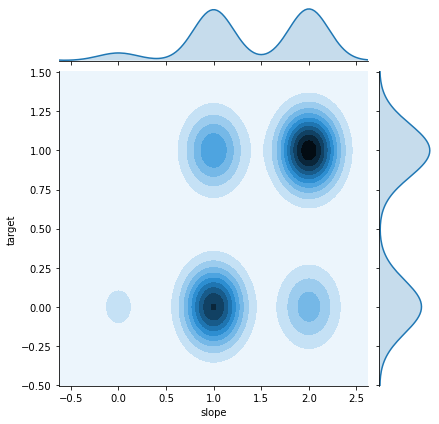

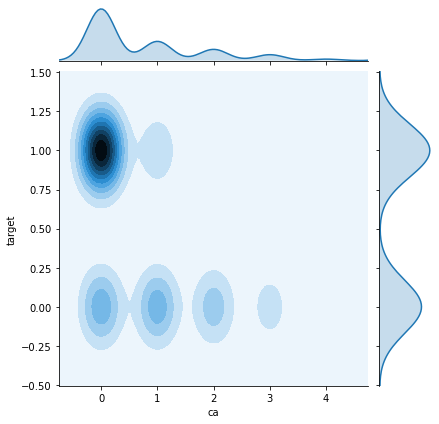

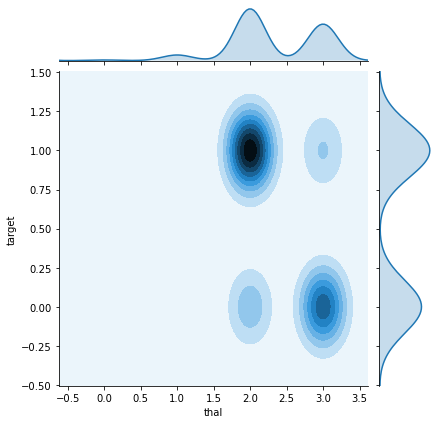

In [31]:
features=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal',]
plt.figure(figsize=(12,10))
for i,feature in enumerate(features):
    sns.jointplot(x=feature,y='target',data=dataset,kind='kde')

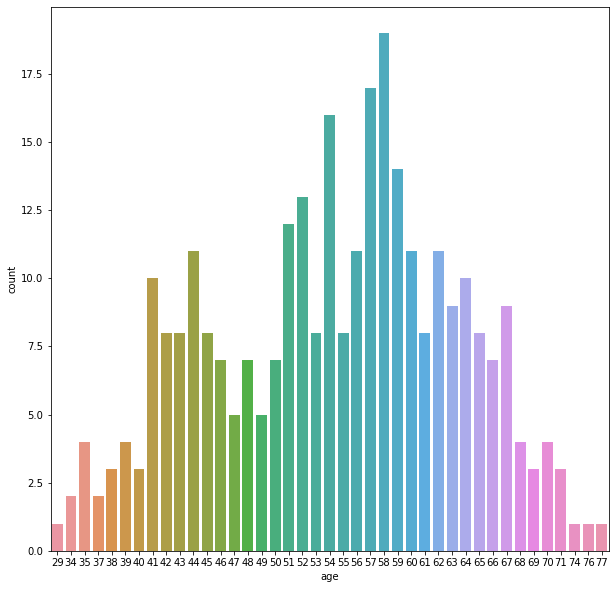

In [32]:
plt.figure(figsize=(10,10))
sns.countplot("age",data=dataset)

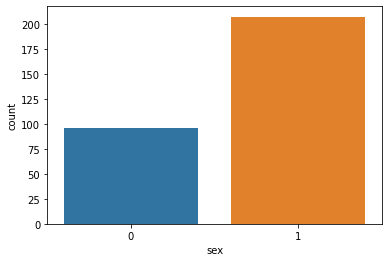

In [33]:
sns.countplot(dataset['sex'])

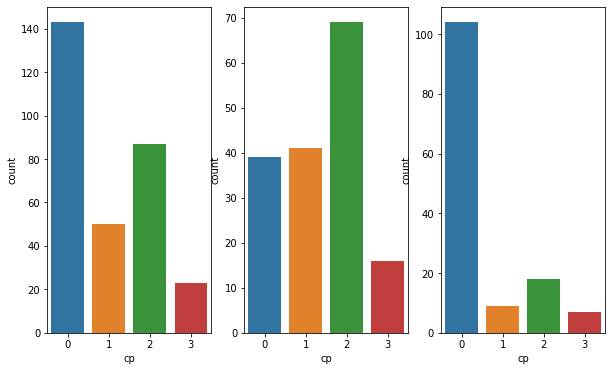

In [34]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
sns.countplot(dataset['cp'])
plt.subplot(1,3,2)
sns.countplot(dataset[dataset.target==1].cp)
plt.subplot(1,3,3)
sns.countplot(dataset[dataset.target==0].cp)

Text(0.5, 1.0, 'target=1')

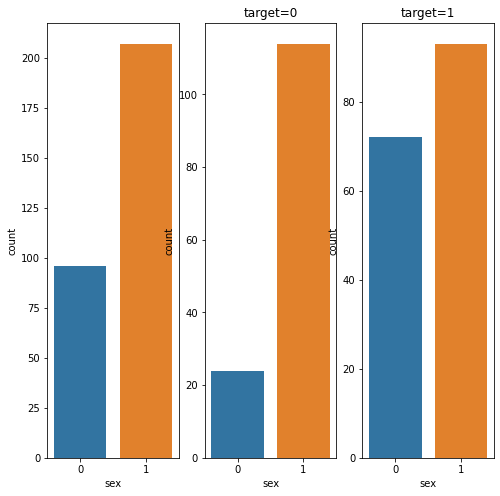

In [35]:
plt.figure(figsize=(8,8))
plt.subplot(1,3,1)
sns.countplot(dataset['sex'])
plt.subplot(1,3,2)
sns.countplot(x=dataset[dataset.target==0].sex)
plt.title('target=0')
plt.subplot(1,3,3)
sns.countplot(x=dataset[dataset.target==1].sex)
plt.title('target=1')

Text(0.5, 1.0, 'target=1')

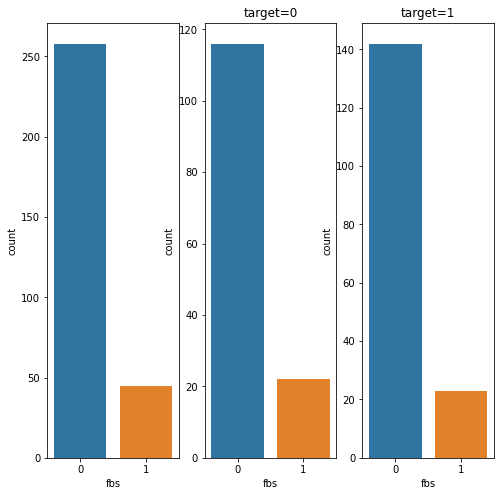

In [36]:
plt.figure(figsize=(8,8))
plt.subplot(1,3,1)
sns.countplot(dataset['fbs'])
plt.subplot(1,3,2)
sns.countplot(x=dataset[dataset.target==0].fbs)
plt.title('target=0')
plt.subplot(1,3,3)
sns.countplot(x=dataset[dataset.target==1].fbs)
plt.title('target=1')

Text(0.5, 1.0, 'target=1')

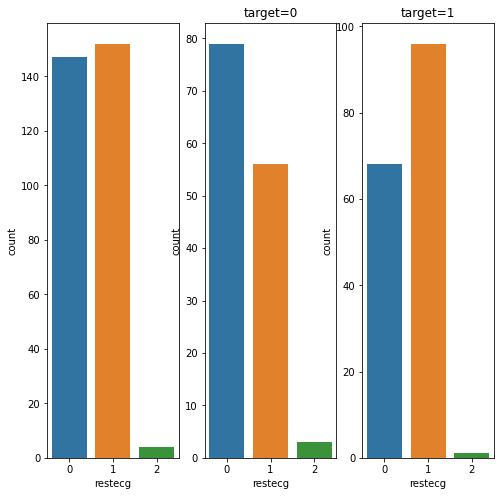

In [37]:
plt.figure(figsize=(8,8))
plt.subplot(1,3,1)
sns.countplot(dataset['restecg'])
plt.subplot(1,3,2)
sns.countplot(x=dataset[dataset.target==0].restecg)
plt.title('target=0')
plt.subplot(1,3,3)
sns.countplot(x=dataset[dataset.target==1].restecg)
plt.title('target=1')

Text(0.5, 1.0, 'target=1')

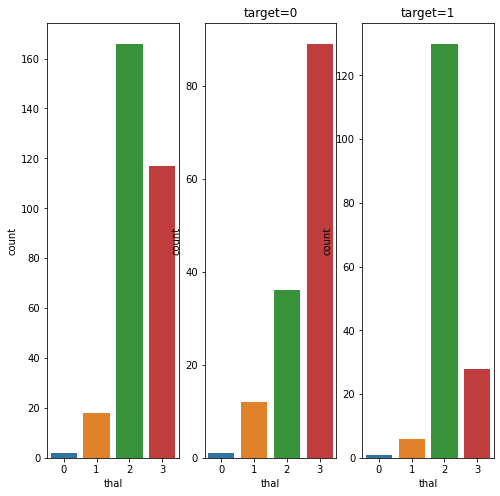

In [38]:
plt.figure(figsize=(8,8))
plt.subplot(1,3,1)
sns.countplot(dataset['thal'])
plt.subplot(1,3,2)
sns.countplot(x=dataset[dataset.target==0].thal)
plt.title('target=0')
plt.subplot(1,3,3)
sns.countplot(x=dataset[dataset.target==1].thal)
plt.title('target=1')

Text(0.5, 1.0, 'target=1')

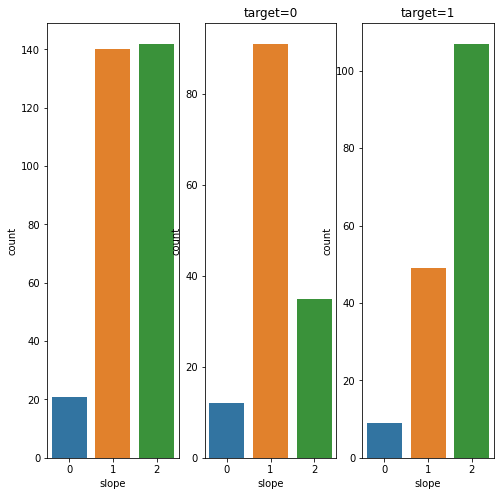

In [39]:
plt.figure(figsize=(8,8))
plt.subplot(1,3,1)
sns.countplot(dataset['slope'])
plt.subplot(1,3,2)
sns.countplot(x=dataset[dataset.target==0].slope)
plt.title('target=0')
plt.subplot(1,3,3)
sns.countplot(x=dataset[dataset.target==1].slope)
plt.title('target=1')

Text(0.5, 1.0, 'target=1')

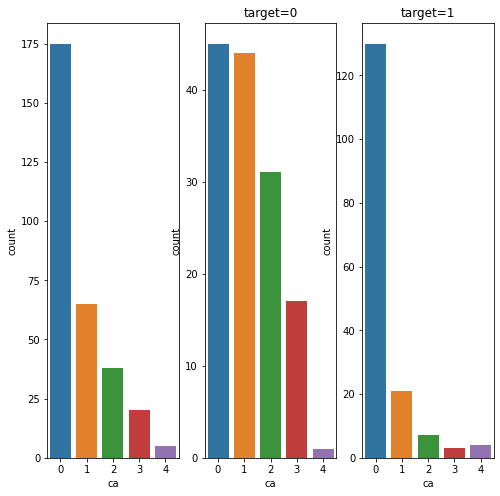

In [40]:
plt.figure(figsize=(8,8))
plt.subplot(1,3,1)
sns.countplot(dataset['ca'])
plt.subplot(1,3,2)
sns.countplot(x=dataset[dataset.target==0].ca)
plt.title('target=0')
plt.subplot(1,3,3)
sns.countplot(x=dataset[dataset.target==1].ca)
plt.title('target=1')

In [41]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [42]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=0)

Models

Logistic Regression

In [44]:
classifier1=LogisticRegression()

In [45]:
param_grid=[
    { "penalty":['l1', 'l2', 'elasticnet', 'none'],
     "max_iter":[100,300,500,1000],
     "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
     "C":np.logspace(-4,4,20),
     "multi_class":['auto', 'ovr', 'multinomial']
    }
]

In [46]:
classifier1_randomcv=RandomizedSearchCV(estimator=classifier1,param_distributions=param_grid,cv=3,n_jobs=-1,verbose=True)

In [47]:
classifier1_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.7s finished


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'max_iter': [100, 300, 500, 1000],
                                         'multi_class': ['auto', 'ovr',
                                                         'multinomial'],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['newton-cg', 'lbfgs',
                                                    'liblinear', 'sag',
                     

In [48]:
classifier1_randomcv.best_params_

{'solver': 'sag',
 'penalty': 'l2',
 'multi_class': 'auto',
 'max_iter': 500,
 'C': 0.615848211066026}

In [49]:
best_random_grid=classifier1_randomcv.best_estimator_

In [50]:
y_pred=best_random_grid.predict(x_test)

In [51]:
accuracy_score(y_test,y_pred)

0.8478260869565217

In [52]:
confusion_matrix(y_test,y_pred)

array([[19,  4],
       [ 3, 20]], dtype=int64)

Decision Tree Classifier

In [53]:
classifier2=DecisionTreeClassifier()

In [54]:
param_grid=[
    { 'criterion':["gini", "entropy"],
    'splitter':['best','random'],
    'max_depth':range(1,10),
    'min_samples_split':range(1,10),
    'min_samples_leaf':range(1,10),
    'max_features':["auto", "sqrt", "log2"]
   }
]

In [55]:
classifier2_randomcv=RandomizedSearchCV(estimator=classifier2,param_distributions=param_grid,n_iter=10,cv=10,random_state=5)

In [56]:
classifier2_randomcv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': range(1, 10),
                                         'max_features': ['auto', 'sqrt',
                                                          'log2'],
                                         'min_samples_leaf': range(1, 10),
                                         'min_samples_split': range(1, 10),
                                         'splitter': ['best', 'random']}],
                   random_state=5)

In [57]:
classifier2_randomcv.best_params_

{'splitter': 'random',
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'gini'}

In [58]:
best_random_grid2=classifier2_randomcv.best_estimator_

In [59]:
y_pred=best_random_grid2.predict(x_test)

In [60]:
accuracy_score(y_test,y_pred)

0.7391304347826086

In [61]:
confusion_matrix(y_test,y_pred)

array([[19,  4],
       [ 8, 15]], dtype=int64)

Random Forest Classifier

In [62]:
classifier3=RandomForestClassifier()

In [63]:
param_grid=[
    { 'criterion':["gini", "entropy"],
    'n_estimators':[100,200,500,800,1000,1500],
    'max_depth':range(1,10),
    'min_samples_split':range(1,10),
    'min_samples_leaf':range(1,10),
    'max_features':["auto", "sqrt", "log2"]
        
    }
]

In [64]:
classifier3_randomcv=RandomizedSearchCV(estimator=classifier3,param_distributions=param_grid,n_iter=10,cv=10,random_state=5)

In [65]:
classifier3_randomcv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': range(1, 10),
                                         'max_features': ['auto', 'sqrt',
                                                          'log2'],
                                         'min_samples_leaf': range(1, 10),
                                         'min_samples_split': range(1, 10),
                                         'n_estimators': [100, 200, 500, 800,
                                                          1000, 1500]}],
                   random_state=5)

In [66]:
classifier3_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 3,
 'criterion': 'gini'}

In [67]:
best_random_grid3=classifier3_randomcv.best_estimator_

In [68]:
y_pred=best_random_grid3.predict(x_test)

In [69]:
accuracy_score(y_test,y_pred)

0.8695652173913043

In [70]:
confusion_matrix(y_test,y_pred)

array([[19,  4],
       [ 2, 21]], dtype=int64)

Support vector classifier

In [71]:
classifier4=SVC()

In [72]:
param_grid=[
    { 'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
     'C':np.logspace(-4,4,20),
     'degree':[1,2,3,4,5,6],
            }
]

In [73]:
classifier4_random_cv=RandomizedSearchCV(estimator=classifier4,param_distributions=param_grid,n_iter=10,cv=10,random_state=10)
                                         

In [74]:
classifier4_random_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'degree': [1, 2, 3, 4, 5, 6],
                                         'kernel': ['linear', 'poly', 'rbf',
                                                    'sigmoid']}],
                   random_state=10)

In [75]:
classifier4_random_cv.best_params_

{'kernel': 'sigmoid', 'degree': 4, 'C': 0.08858667904100823}

In [76]:
best_random_grid4=classifier4_random_cv.best_estimator_

In [77]:
y_pred=best_random_grid4.predict(x_test)

In [78]:
accuracy_score(y_test,y_pred)

0.8043478260869565

In [79]:
confusion_matrix(y_test,y_pred)

array([[17,  6],
       [ 3, 20]], dtype=int64)

AdaBoostClassifier

In [80]:
classifier5=AdaBoostClassifier()

In [81]:
param_grid=[
    { 'n_estimators':[50,100,150,200,500,1000]
    }
]

In [82]:
classifier5_randomcv=RandomizedSearchCV(estimator=classifier5,param_distributions=param_grid,n_iter=10,cv=10,random_state=10)

In [83]:
classifier5_randomcv.fit(x_train,y_train)

C:\Anaconda_program\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(),
                   param_distributions=[{'n_estimators': [50, 100, 150, 200,
                                                          500, 1000]}],
                   random_state=10)

In [84]:
classifier5_randomcv.best_params_

{'n_estimators': 50}

In [85]:
best_random_grid5=classifier5_randomcv.best_estimator_

In [86]:
y_pred=best_random_grid.predict(x_test)

In [87]:
accuracy_score(y_test,y_pred)

0.8478260869565217

In [88]:
confusion_matrix(y_test,y_pred)

array([[19,  4],
       [ 3, 20]], dtype=int64)

GradientBoostingClassifier

In [89]:
classifier6=GradientBoostingClassifier()

In [90]:
param_grid=[
    { 'loss':['deviance', 'exponential'],
    'learning_rate':[0.1,0.2,0.3,0.15],
    'n_estimators':[100,200,500,700,1000],
    'subsample':[1.0,0.8,0.6,0.5],
    'criterion':['friedman_mse', 'mse', 'mae'],
    'min_samples_split':range(1,10),
    'min_samples_leaf':range(1,10),
        
    }
]

In [91]:
classifier6_randomcv=RandomizedSearchCV(estimator=classifier6,param_distributions=param_grid,n_iter=10,cv=10,random_state=10)

In [92]:
classifier6_randomcv.fit(x_train,y_train)

C:\Anaconda_program\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda_program\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda_program\lib\site-packages\sklearn\ensemble\_gb.py", line 498, in fit
    n_stages = self._fit_stages(
  File "C:\Anaconda_program\lib\site-packages\sklearn\ensemble\_gb.py", line 555, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Anaconda_program\lib\site-packages\sklearn\ensemble\_gb.py", line 211, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Anaconda_program\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Anaconda_program\lib\site-packages\sklearn\tree\_classes.py"

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions=[{'criterion': ['friedman_mse', 'mse',
                                                       'mae'],
                                         'learning_rate': [0.1, 0.2, 0.3, 0.15],
                                         'loss': ['deviance', 'exponential'],
                                         'min_samples_leaf': range(1, 10),
                                         'min_samples_split': range(1, 10),
                                         'n_estimators': [100, 200, 500, 700,
                                                          1000],
                                         'subsample': [1.0, 0.8, 0.6, 0.5]}],
                   random_state=10)

In [93]:
classifier6_randomcv.best_params_

{'subsample': 0.8,
 'n_estimators': 1000,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'loss': 'exponential',
 'learning_rate': 0.15,
 'criterion': 'mae'}

In [94]:
best_random_grid6=classifier6_randomcv.best_estimator_

In [95]:
y_pred=best_random_grid6.predict(x_test)

In [96]:
accuracy_score(y_test,y_pred)

0.782608695652174

In [97]:
confusion_matrix(y_test,y_pred)

array([[18,  5],
       [ 5, 18]], dtype=int64)

In [98]:
!pip install XGBoost

 xgboost

In [99]:
classifier7=xgboost.XGBClassifier()

In [100]:
param_grid=[
    { 'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
     'max_depth':[3,4,5,6,8,10,12,15],
     'min_chid_weight':[1,3,5,7],
     'gamma':[0.0,0.1,0.2,0.3,0.4],
     'colsample_bytree':[0.3,0.5,0.4,0.7]
        
    }
]

In [101]:
classifier7_randomcv=RandomizedSearchCV(estimator=classifier7,param_distributions=param_grid,n_iter=10,cv=10,random_state=10)

In [102]:
classifier7_randomcv.fit(x_train,y_train)

[07:26:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_chid_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:26:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda_program\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:26:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_chid_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:26:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:26:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_chid_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters

[07:26:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_chid_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:26:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:26:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_chid_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters

[07:26:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_chid_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:26:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:26:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_chid_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters

[07:26:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_chid_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:26:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:26:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_chid_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters

[07:26:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_chid_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:26:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:26:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_chid_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters

[07:26:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_chid_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:26:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:26:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_chid_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters

[07:26:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_chid_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:26:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:26:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_chid_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters

[07:26:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_chid_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:26:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:26:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_chid_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters

[07:26:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_chid_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:26:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:26:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_chid_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [103]:
classifier7_randomcv.best_params_

{'min_chid_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [104]:
best_random_grid7=classifier7_randomcv.best_estimator_

In [105]:
y_pred=best_random_grid7.predict(x_test)

In [106]:
accuracy_score(y_test,y_pred)

0.8260869565217391

In [107]:
confusion_matrix(y_test,y_pred)

array([[19,  4],
       [ 4, 19]], dtype=int64)

KnearestNeighbors

In [108]:
classifier8=KNeighborsClassifier()

In [109]:
param_grid=[
    {'n_neighbors':[5,7,9,11],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[30,40,50,60,100],
    'p':[1,2,3,4,5,6]
        
    }
]

In [110]:
classifier8_randomcv=RandomizedSearchCV(estimator=classifier8,param_distributions=param_grid,n_iter=10,cv=10)

In [111]:
classifier8_randomcv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions=[{'algorithm': ['auto', 'ball_tree',
                                                       'kd_tree', 'brute'],
                                         'leaf_size': [30, 40, 50, 60, 100],
                                         'n_neighbors': [5, 7, 9, 11],
                                         'p': [1, 2, 3, 4, 5, 6],
                                         'weights': ['uniform', 'distance']}])

In [112]:
classifier8_randomcv.best_params_

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 9,
 'leaf_size': 60,
 'algorithm': 'kd_tree'}

In [113]:
best_random_grid8=classifier8_randomcv.best_estimator_

In [114]:
y_pred=best_random_grid8.predict(x_test)

In [115]:
accuracy_score(y_test,y_pred)

0.7608695652173914

In [116]:
confusion_matrix(y_test,y_pred)

array([[16,  7],
       [ 4, 19]], dtype=int64)

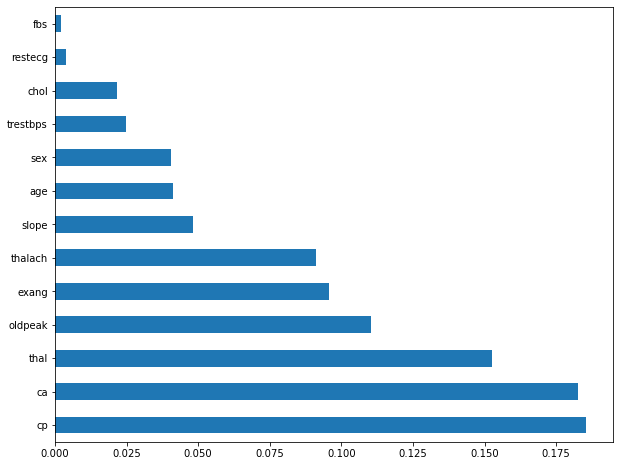

In [117]:
plt.figure(figsize=(10,8))
feat_importances = pd.Series(best_random_grid3.feature_importances_, index=dataset.iloc[:,:-1].columns)
feat_importances.nlargest(13).plot(kind='barh')

Observations

LogisticRegression
accuracy_score :84 %
---------------------------
decisiontreeclassifier
accuracy_score :73 %
---------------------------
RandomforestClassifier
accuracy_score :80 %
---------------------------
SVC
accuracy_score :80 %
---------------------------
KNeighbourClassifier
accuracy_score :76 %
--------------------------
AdaBoost
accuracy_score :84 %
--------------------------
GradientBoostingClassifier
accuracy_score :78 %
-------------------------
XGBoostClassifier
accuracy_score : 82 %
-------------------------    
    
    

In [118]:
###open file when you want to store the data
file=open('heart_disease_predictor.pkl','wb')
### dump the information into the file
pickle.dump(classifier1_randomcv,file)

In [119]:
with open('heart_disease.pkl','wb') as f:
    pickle.dump(classifier1_randomcv,f)